In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [30]:
dfs = []
names = []
for data in os.listdir("../logs/experiment/meta1"):
    df = pd.read_csv(f"../logs/experiment/meta1/{data}", sep=",")
    # print(df.head())
    dfs.append(df)
    names.append(data)

In [39]:
namess = []
for name in names:
    new_name = name.split("_")[3:7]
    nn = ""
    for n in new_name:
        nn += n + "-"
    namess.append(nn[:-1])
names = namess

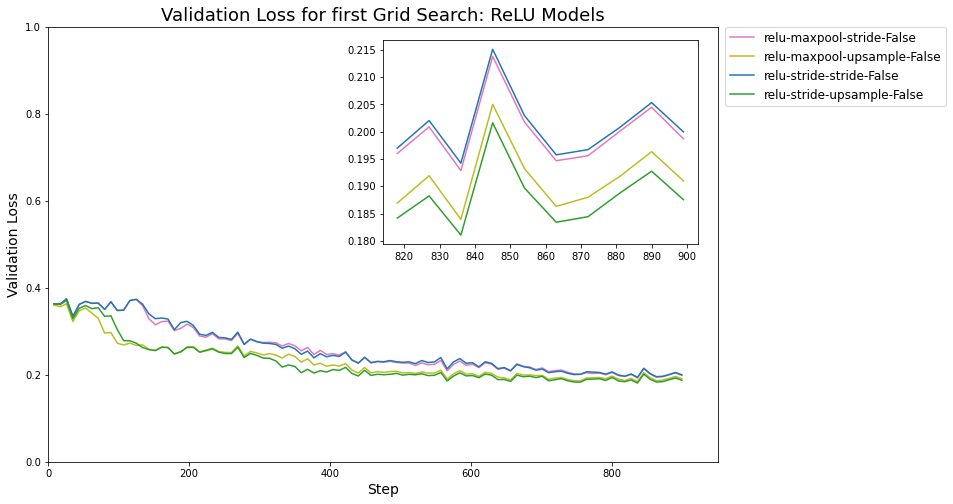

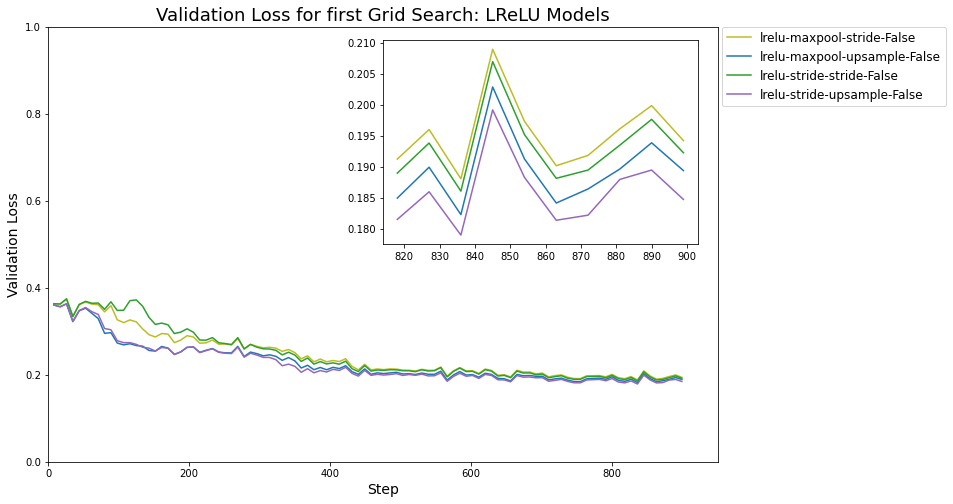

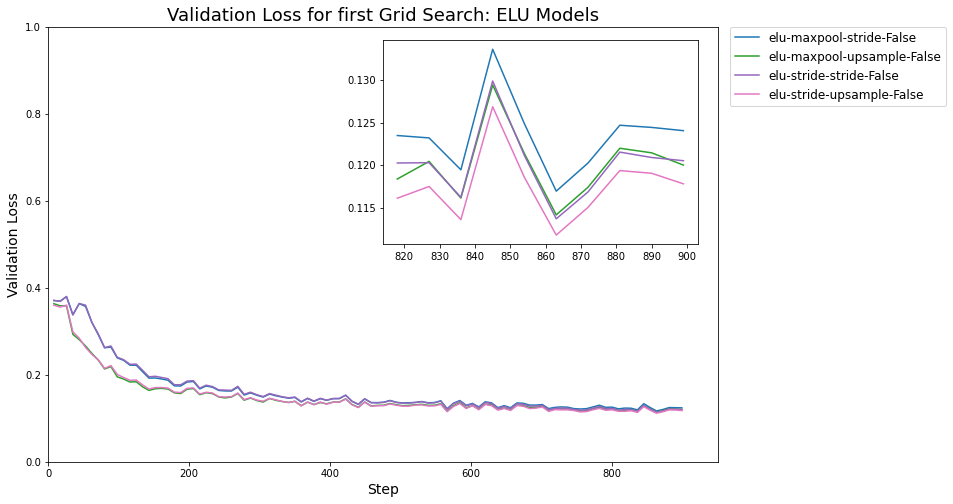

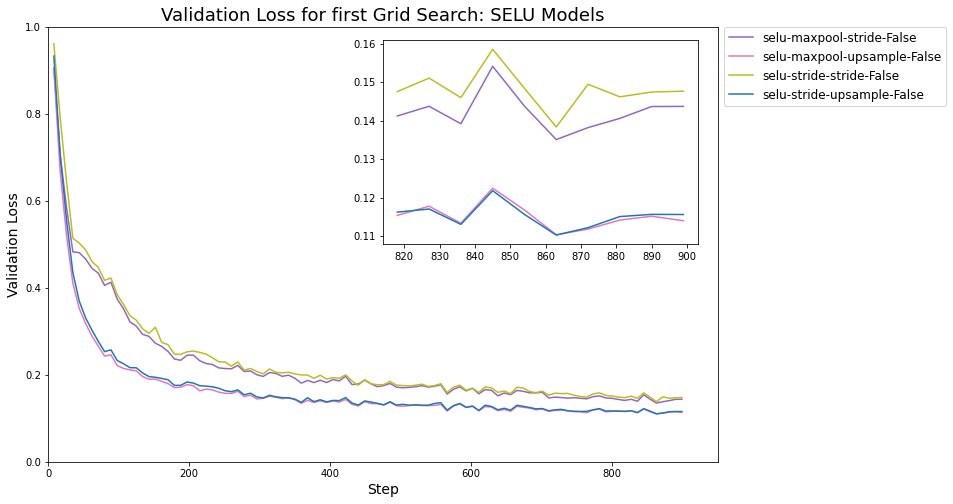

In [95]:
title_dict = {
    "r": "ReLU",
    "l": "LReLU",
    "e": "ELU",
    "s": "SELU",
}
for act in ["r", "l", "e", "s"]:
    fig, ax = plt.subplots(figsize=(12, 8))
    axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
    for i, df in enumerate(dfs):
        if not df["Value"].isnull().values.any():
            if names[i][0] == act:
                if names[i][-2] == "s":
                    ax.plot(df["Step"], df["Value"], label=names[i], color=f"C{i}")
                    if np.array(df["Step"])[-1] > 600:
                        axins.plot(df["Step"][-10:], df["Value"][-10:], color=f"C{i}")
            
    plt.title(f"Validation Loss for first Grid Search: {title_dict[act]} Models", size=18)
    plt.xlabel("Step", size=14)
    plt.ylabel("Validation Loss", size=14)
    plt.ylim(0, 1)
    plt.xlim(0, 950)
    plt.legend(bbox_to_anchor=(1.35,1.014), loc="upper right", fontsize=12)
    plt.show()

In [79]:
activation_dict = {
    "relu": "ReLU",
    "lrelu": "LReLU",
    "elu": "ELU",
    "selu": "SELU",
}
downsampling_dict = {
    "maxpool": "Maxpooling",
    "stride": "Strided Convolution",
}
upsampling_dict = {
    "upsample": "Nearest Neighbour Upsampling",
    "stride": "Strided Convolution",
}
batchnorm_dict = {
    "True": "Enabled",
    "False": "Disabled",
}
for i, df in enumerate(dfs):
    df.dropna(inplace=True)
    meta = names[i].split("-")
    print(f"{np.round(np.array(df['Value']).min(), 6)} & {activation_dict[meta[0]]} &  {downsampling_dict[meta[1]]} &  {upsampling_dict[meta[2]]} &  {batchnorm_dict[meta[3]]}")

0.116936 & ELU &  Maxpooling &  Strided Convolution &  Disabled
0.370251 & ELU &  Maxpooling &  Strided Convolution &  Enabled
0.114145 & ELU &  Maxpooling &  Nearest Neighbour Upsampling &  Disabled
0.084513 & ELU &  Maxpooling &  Nearest Neighbour Upsampling &  Enabled
0.113682 & ELU &  Strided Convolution &  Strided Convolution &  Disabled
0.370238 & ELU &  Strided Convolution &  Strided Convolution &  Enabled
0.111767 & ELU &  Strided Convolution &  Nearest Neighbour Upsampling &  Disabled
0.087574 & ELU &  Strided Convolution &  Nearest Neighbour Upsampling &  Enabled
0.188042 & LReLU &  Maxpooling &  Strided Convolution &  Disabled
0.351211 & LReLU &  Maxpooling &  Strided Convolution &  Enabled
0.182255 & LReLU &  Maxpooling &  Nearest Neighbour Upsampling &  Disabled
0.163707 & LReLU &  Maxpooling &  Nearest Neighbour Upsampling &  Enabled
0.186044 & LReLU &  Strided Convolution &  Strided Convolution &  Disabled
0.35673 & LReLU &  Strided Convolution &  Strided Convolution &  